In [120]:
from covariant_integrator_library import *
from bunch_inits import *
from plotting_variables import *

font_size = 16
# Update the rcParams dictionary to set the font size globally
plt.rcParams.update({'font.size': font_size})

E_MeV =  3000000.08840273
Gamma =  3196.979068106551
E_rest =  938.385948501337
E_MeV =  -2999984.0431710184
Gamma =  15.574424102566912
E_rest =  193020.75925874696
2.45e-08
129.10250182715365
driver fractional energy shift [0.89678652]
rider fractional energy shift [0.99241235]


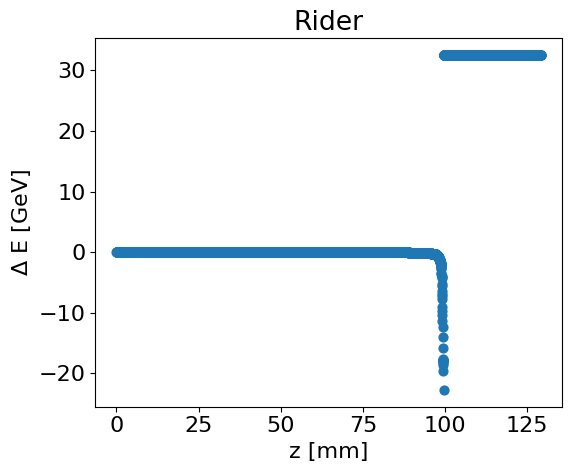

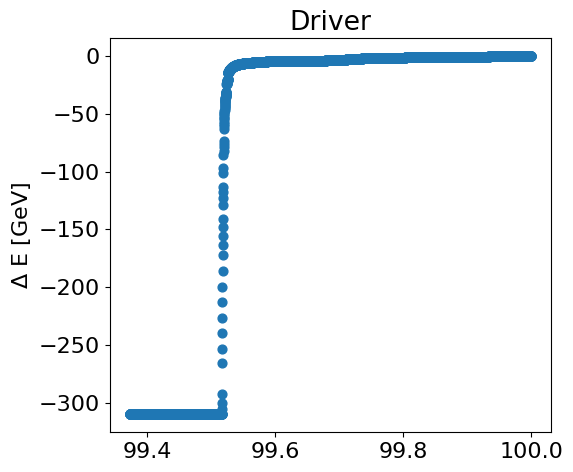

E_MeV =  2906896.5317660947
Gamma =  3097.762373648603
E_rest =  938.385948501337
E_MeV =  -2906853.785323031
Gamma =  15.092963188696311
E_rest =  193020.75925874696
3.1e-08
158.28434149133113
driver fractional energy shift [0.89678652 0.93862898]
rider fractional energy shift [0.99241235 0.99435258]


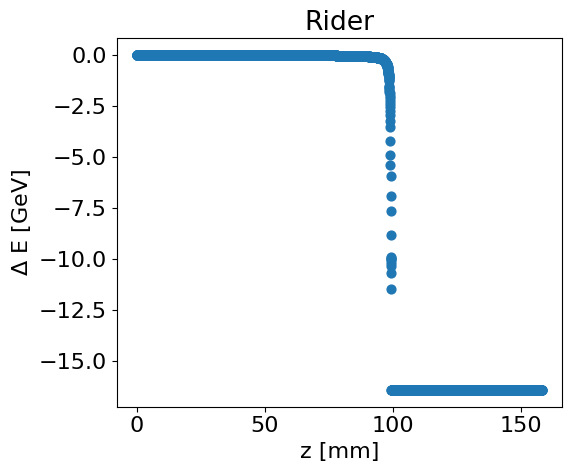

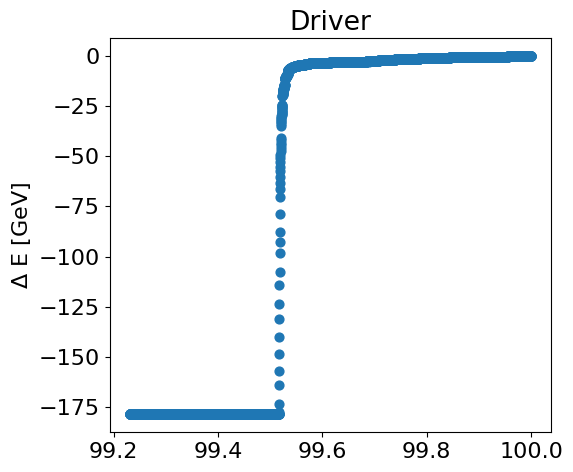

E_MeV =  2813793.219859169
Gamma =  2998.545940320698
E_rest =  938.385948501337
E_MeV =  -2813791.0519209225
Gamma =  14.611919063020675
E_rest =  193020.75925874696
3.75e-08
185.34024460481217
driver fractional energy shift [0.89678652 0.93862898 0.95080343]
rider fractional energy shift [0.99241235 0.99435258 0.96533163]


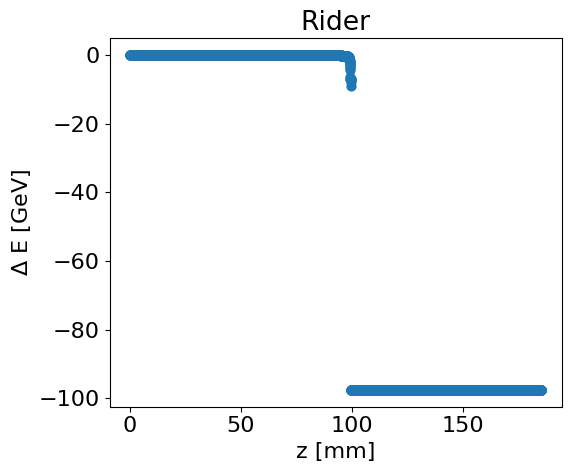

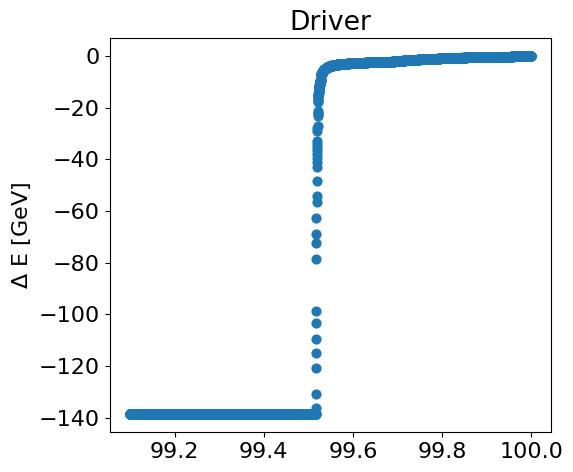

E_MeV =  2720689.623146025
Gamma =  2899.329203851848
E_rest =  938.385948501337
E_MeV =  -2720654.931140154
Gamma =  14.130570277969467
E_rest =  193020.75925874696
4.4e-08
210.27017883180173
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336]


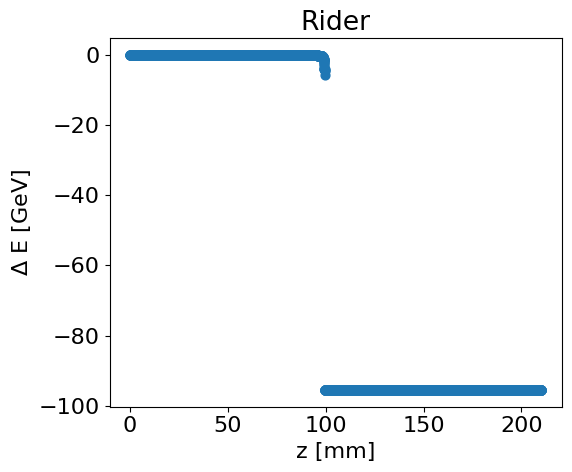

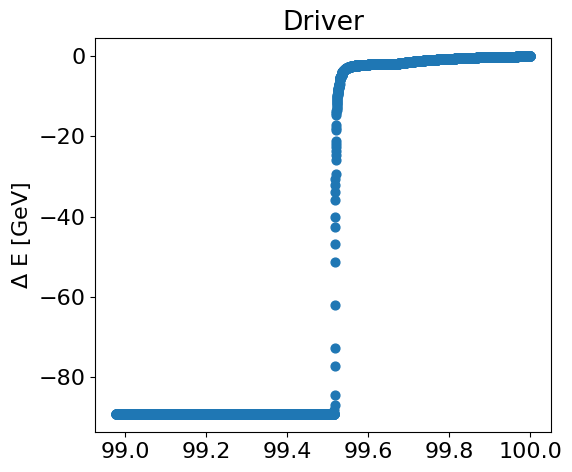

E_MeV =  2627586.0775040057
Gamma =  2800.1125222118058
E_rest =  938.385948501337
E_MeV =  -2627569.8260195144
Gamma =  13.649567697883485
E_rest =  193020.75925874696
5.0499999999999996e-08
233.07416441751062
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235]


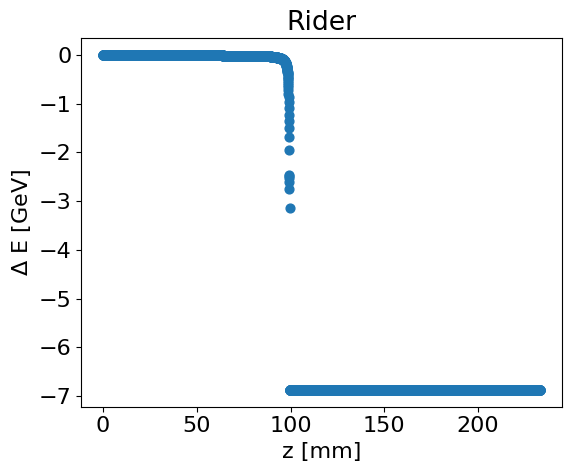

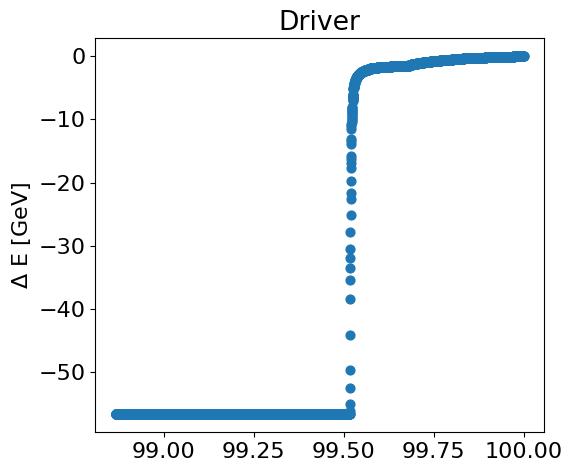

E_MeV =  2534482.7875926783
Gamma =  2700.8961135425534
E_rest =  938.385948501337
E_MeV =  -2534424.900944083
Gamma =  13.168347664112932
E_rest =  193020.75925874696
5.700000000000001e-08
253.75222303062603
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339]


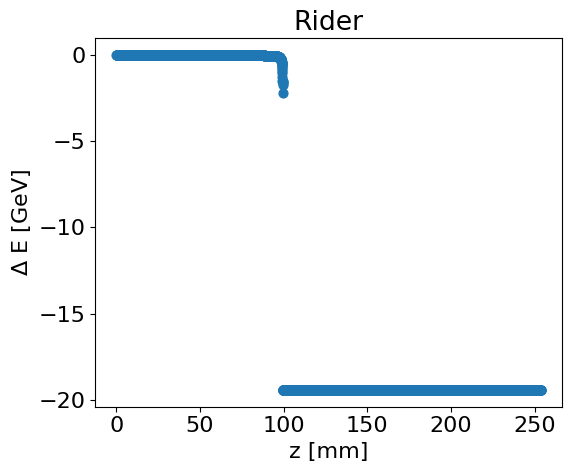

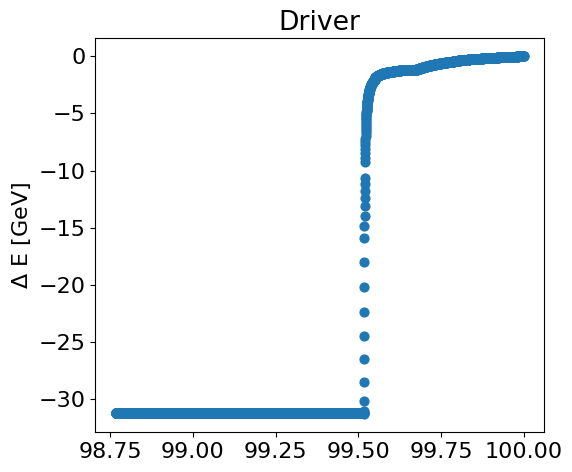

E_MeV =  2441379.397128485
Gamma =  2601.6795982184817
E_rest =  938.385948501337
E_MeV =  -2441366.9842336094
Gamma =  12.687679116553666
E_rest =  193020.75925874696
6.35e-08
272.3043240754782
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312
 0.98984503]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339
 0.99691727]


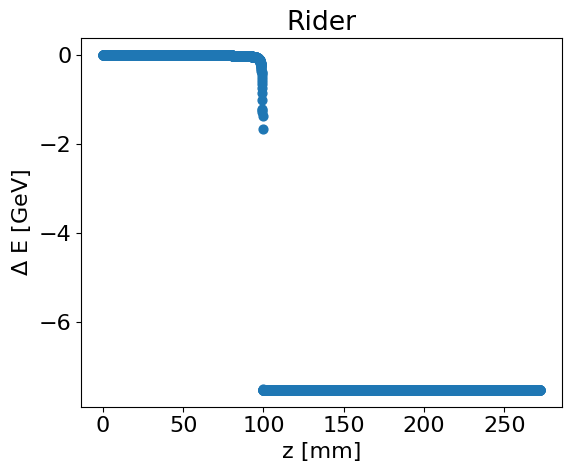

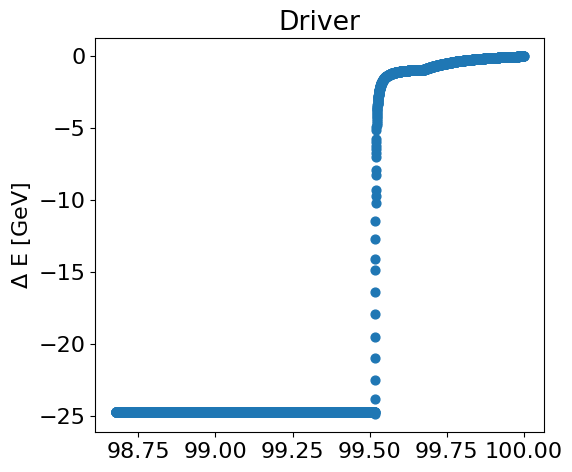

E_MeV =  2348276.00940238
Gamma =  2502.463086372086
E_rest =  938.385948501337
E_MeV =  -2348254.692184899
Gamma =  12.206843774482879
E_rest =  193020.75925874696
7e-08
288.7304766921089
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312
 0.98984503 0.99317875]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339
 0.99691727 0.99940069]


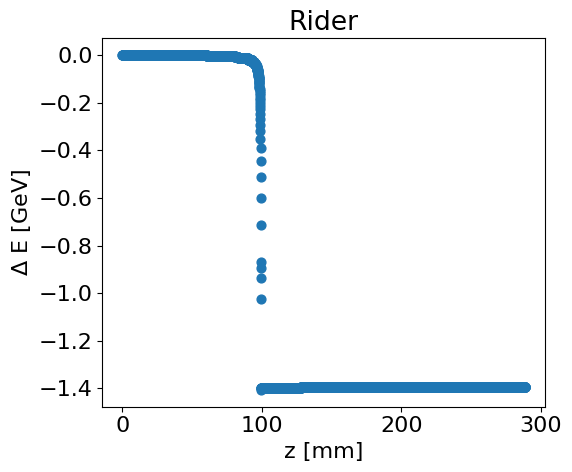

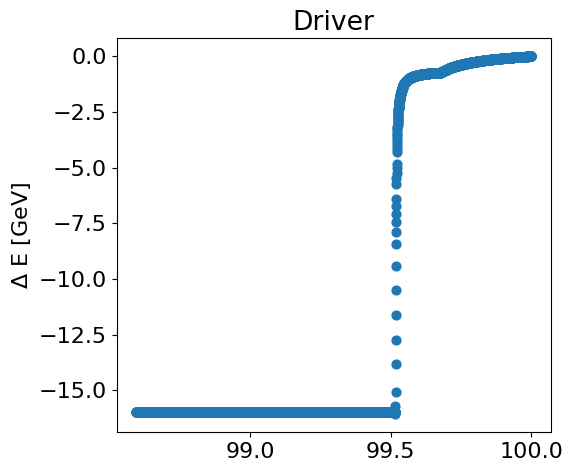

E_MeV =  2255172.3044530354
Gamma =  2403.246237102869
E_rest =  938.385948501337
E_MeV =  -2255150.5612326865
Gamma =  11.726178694644855
E_rest =  193020.75925874696
7.65e-08
303.03063795815143
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312
 0.98984503 0.99317875 0.99470276]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339
 0.99691727 0.99940069 0.99922311]


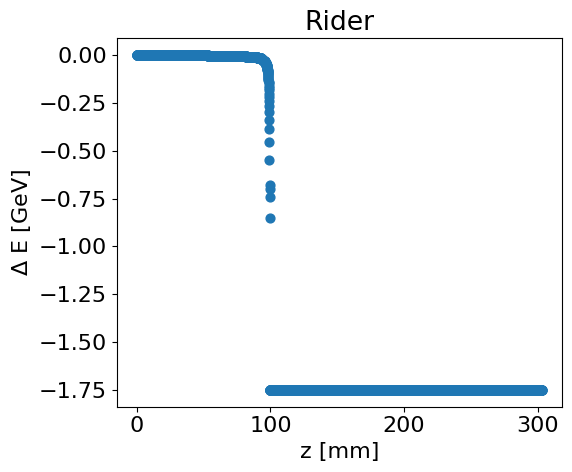

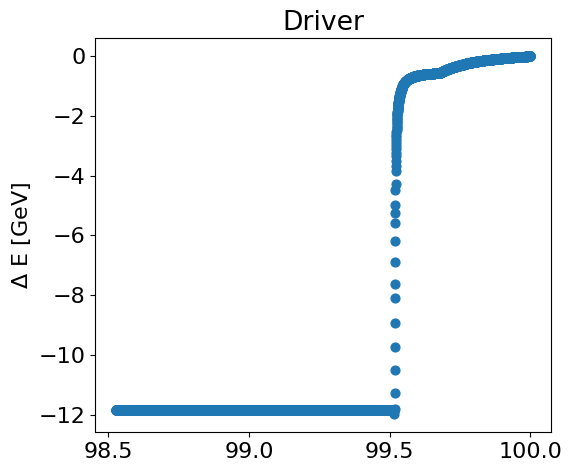

E_MeV =  2162069.0563507113
Gamma =  2304.0298753874445
E_rest =  938.385948501337
E_MeV =  -2162044.9133775122
Gamma =  11.245650327537824
E_rest =  193020.75925874696
8.3e-08
315.20490990376277
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312
 0.98984503 0.99317875 0.99470276 0.99628785]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339
 0.99691727 0.99940069 0.99922311 0.99959776]


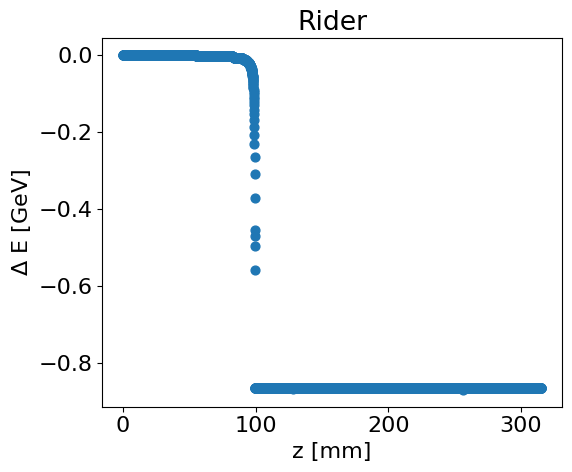

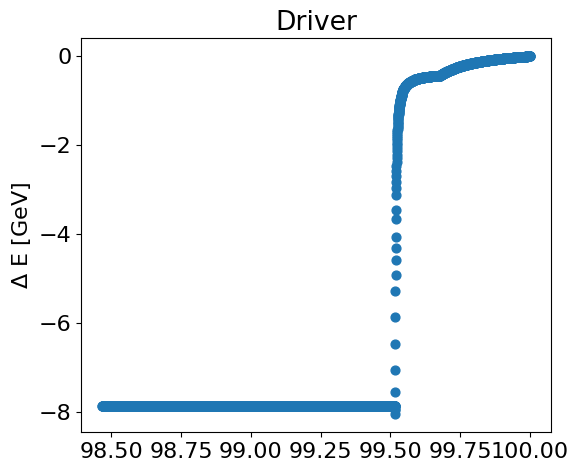

E_MeV =  2068965.3974721655
Gamma =  2204.81307673076
E_rest =  938.385948501337
E_MeV =  -2068940.926982649
Gamma =  10.765294432086193
E_rest =  193020.75925874696
8.95e-08
325.25317172026905
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312
 0.98984503 0.99317875 0.99470276 0.99628785 0.99710766]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339
 0.99691727 0.99940069 0.99922311 0.99959776 0.9976921 ]


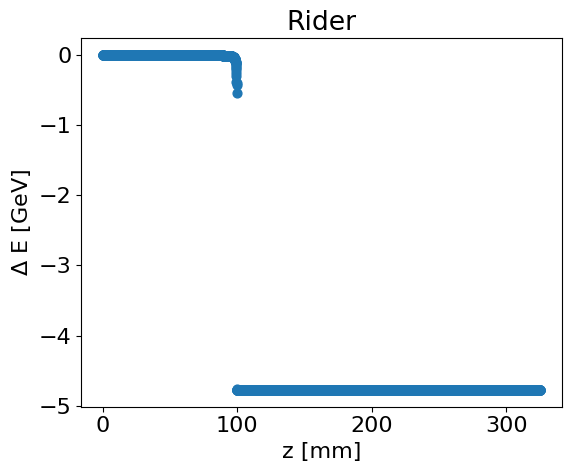

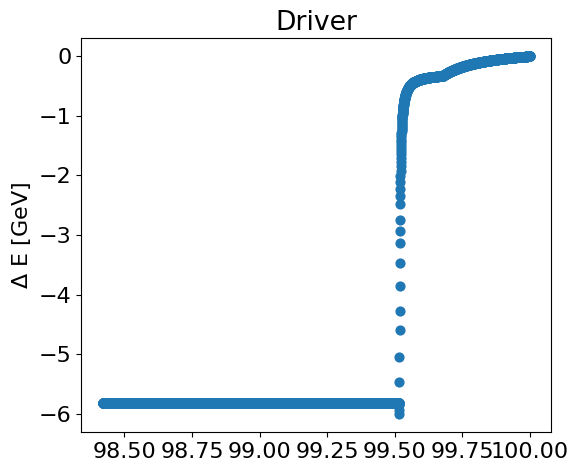

E_MeV =  1975862.0210441644
Gamma =  2105.596579990491
E_rest =  938.385948501337
E_MeV =  -1975843.262369575
Gamma =  10.285157992321045
E_rest =  193020.75925874696
9.600000000000001e-08
333.17552633470376
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312
 0.98984503 0.99317875 0.99470276 0.99628785 0.99710766 0.99781573]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339
 0.99691727 0.99940069 0.99922311 0.99959776 0.9976921  0.99820469]


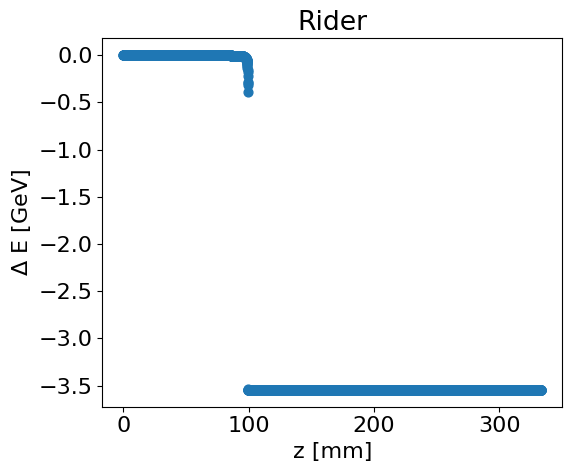

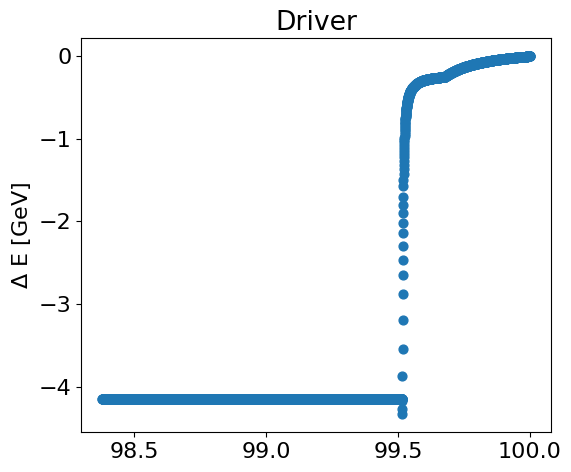

E_MeV =  1882758.630227419
Gamma =  2006.3800689735572
E_rest =  938.385948501337
E_MeV =  -1882708.3220474536
Gamma =  9.805043721803415
E_rest =  193020.75925874696
1.0250000000000001e-07
338.9719298533756
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312
 0.98984503 0.99317875 0.99470276 0.99628785 0.99710766 0.99781573
 0.99834382]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339
 0.99691727 0.99940069 0.99922311 0.99959776 0.9976921  0.99820469
 0.99618437]


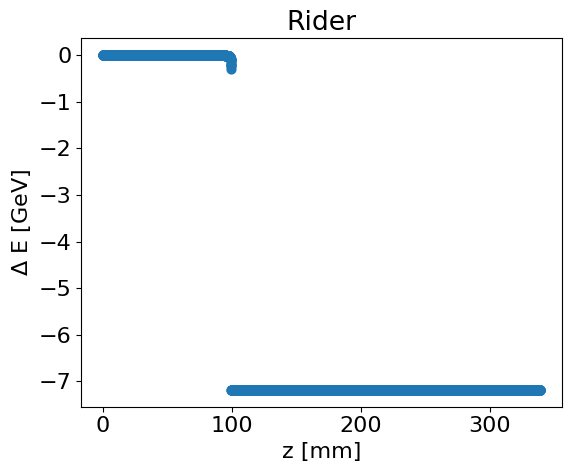

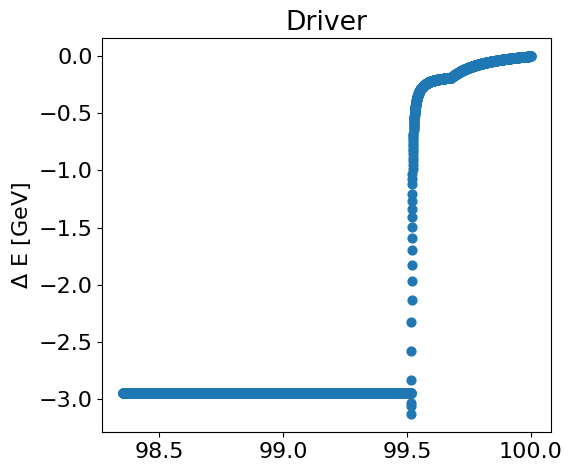

E_MeV =  1789655.0766745945
Gamma =  1907.163385757157
E_rest =  938.385948501337
E_MeV =  -1789610.2051038016
Gamma =  9.325366701039696
E_rest =  193020.75925874696
1.0900000000000001e-07
342.64235363115955
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312
 0.98984503 0.99317875 0.99470276 0.99628785 0.99710766 0.99781573
 0.99834382 0.99871982]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339
 0.99691727 0.99940069 0.99922311 0.99959776 0.9976921  0.99820469
 0.99618437 0.99986043]


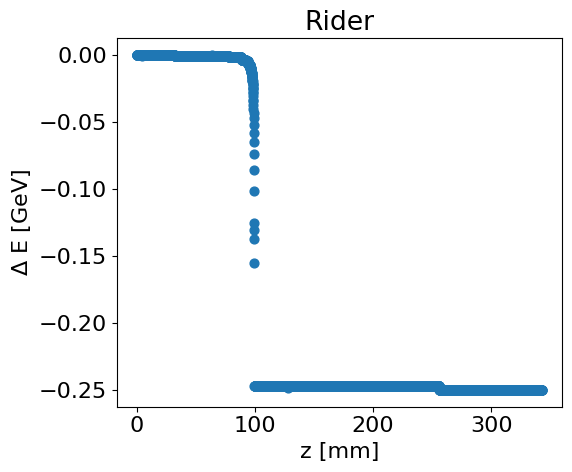

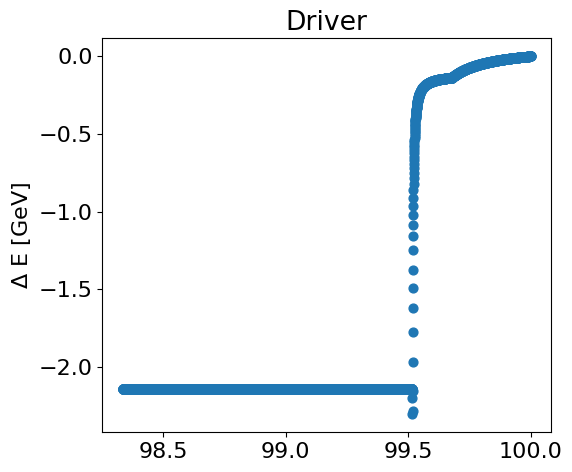

E_MeV =  1696551.7718615036
Gamma =  1807.9469690355306
E_rest =  938.385948501337
E_MeV =  -1696534.7800910287
Gamma =  8.846094111118644
E_rest =  193020.75925874696
1.1550000000000001e-07
344.1868752850954
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312
 0.98984503 0.99317875 0.99470276 0.99628785 0.99710766 0.99781573
 0.99834382 0.99871982 0.99902427]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339
 0.99691727 0.99940069 0.99922311 0.99959776 0.9976921  0.99820469
 0.99618437 0.99986043 0.9998675 ]


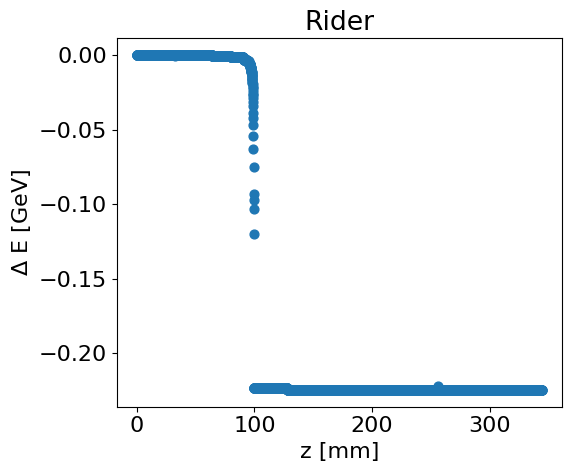

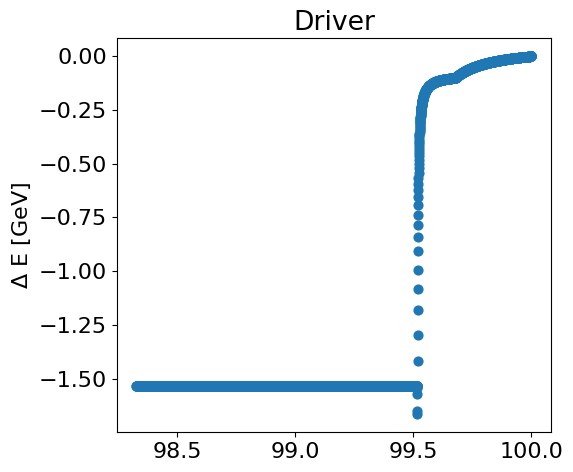

E_MeV =  1603448.3590742638
Gamma =  1708.7304389210176
E_rest =  938.385948501337
E_MeV =  -1603389.8462972664
Gamma =  8.36680087497123
E_rest =  193020.75925874696
1.22e-07
343.6054269999411
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312
 0.98984503 0.99317875 0.99470276 0.99628785 0.99710766 0.99781573
 0.99834382 0.99871982 0.99902427 0.99924863]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339
 0.99691727 0.99940069 0.99922311 0.99959776 0.9976921  0.99820469
 0.99618437 0.99986043 0.9998675  0.99976782]


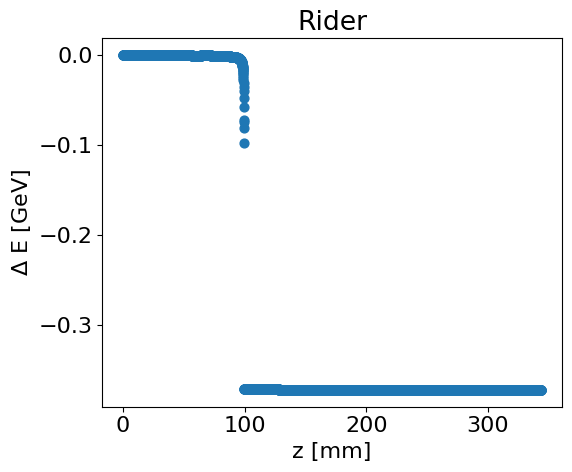

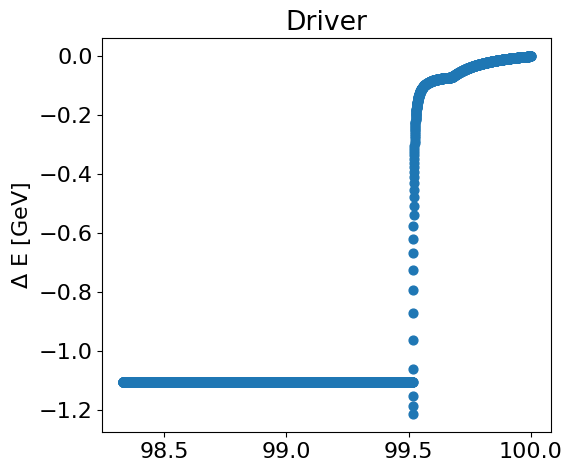

E_MeV =  1510344.8803528792
Gamma =  1609.5138405229313
E_rest =  938.385948501337
E_MeV =  -1510284.8176794809
Gamma =  7.888111601209501
E_rest =  193020.75925874696
1.285e-07
340.8980145829066
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312
 0.98984503 0.99317875 0.99470276 0.99628785 0.99710766 0.99781573
 0.99834382 0.99871982 0.99902427 0.99924863 0.99942534]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339
 0.99691727 0.99940069 0.99922311 0.99959776 0.9976921  0.99820469
 0.99618437 0.99986043 0.9998675  0.99976782 0.99994254]


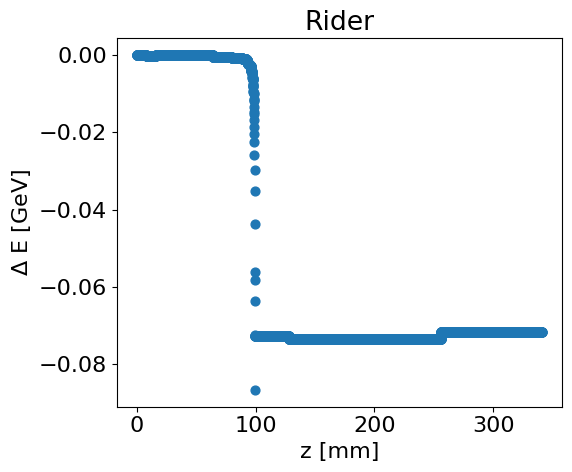

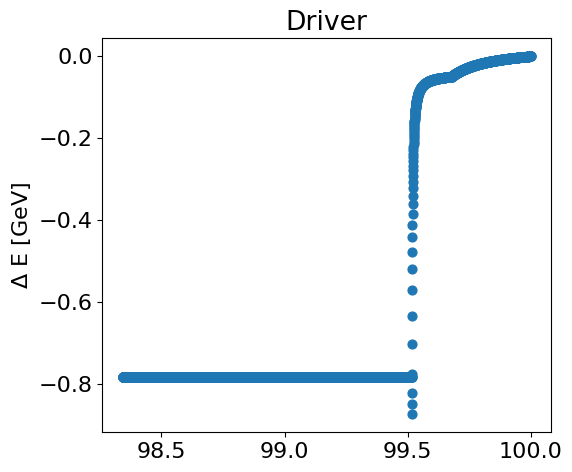

E_MeV =  1417241.2888342177
Gamma =  1510.297124291314
E_rest =  938.385948501337
E_MeV =  -1417219.0865159992
Gamma =  7.410099844607978
E_rest =  193020.75925874696
1.35e-07
336.06462453126363
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312
 0.98984503 0.99317875 0.99470276 0.99628785 0.99710766 0.99781573
 0.99834382 0.99871982 0.99902427 0.99924863 0.99942534 0.99955387]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339
 0.99691727 0.99940069 0.99922311 0.99959776 0.9976921  0.99820469
 0.99618437 0.99986043 0.9998675  0.99976782 0.99994254 0.99781058]


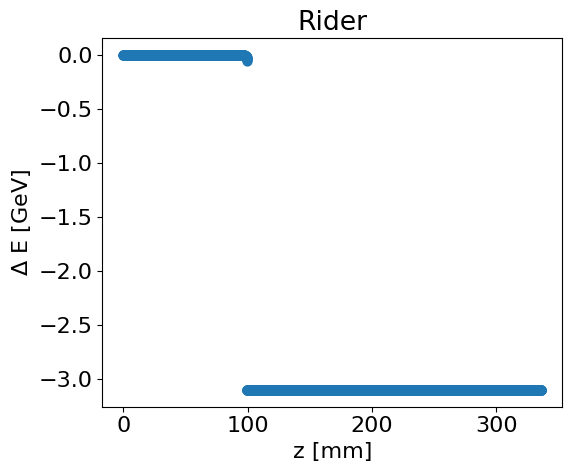

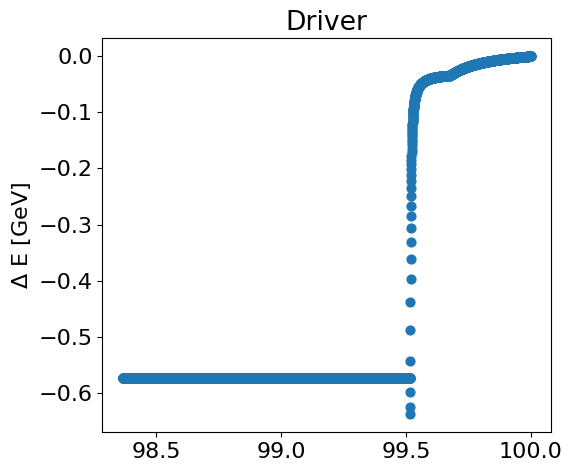

E_MeV =  1324137.9405834882
Gamma =  1411.0806701703018
E_rest =  938.385948501337
E_MeV =  -1324082.4727670155
Gamma =  6.932298420608508
E_rest =  193020.75925874696
1.4150000000000002e-07
329.1053418219253
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312
 0.98984503 0.99317875 0.99470276 0.99628785 0.99710766 0.99781573
 0.99834382 0.99871982 0.99902427 0.99924863 0.99942534 0.99955387
 0.99965994]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339
 0.99691727 0.99940069 0.99922311 0.99959776 0.9976921  0.99820469
 0.99618437 0.99986043 0.9998675  0.99976782 0.99994254 0.99781058
 0.99994455]


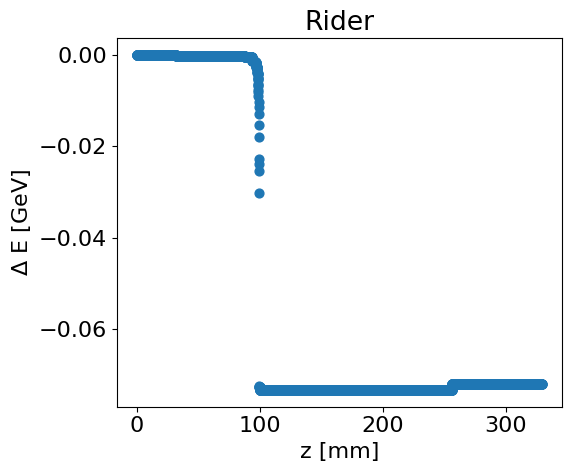

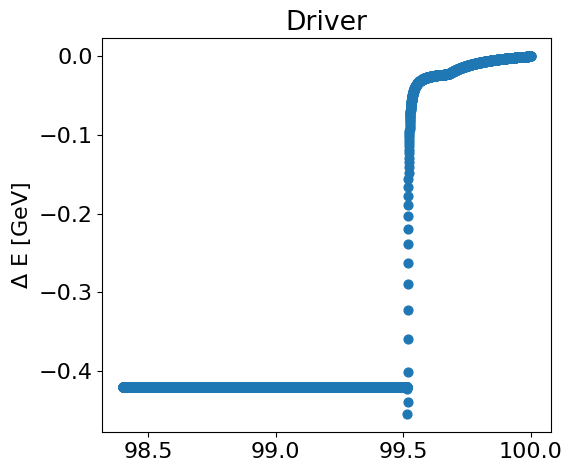

E_MeV =  1231034.506823724
Gamma =  1311.8641284467792
E_rest =  938.385948501337
E_MeV =  -1231021.5473281955
Gamma =  6.455586579114451
E_rest =  193020.75925874696
1.48e-07
320.0200889852478
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312
 0.98984503 0.99317875 0.99470276 0.99628785 0.99710766 0.99781573
 0.99834382 0.99871982 0.99902427 0.99924863 0.99942534 0.99955387
 0.99965994 0.99974865]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339
 0.99691727 0.99940069 0.99922311 0.99959776 0.9976921  0.99820469
 0.99618437 0.99986043 0.9998675  0.99976782 0.99994254 0.99781058
 0.99994455 0.99997231]


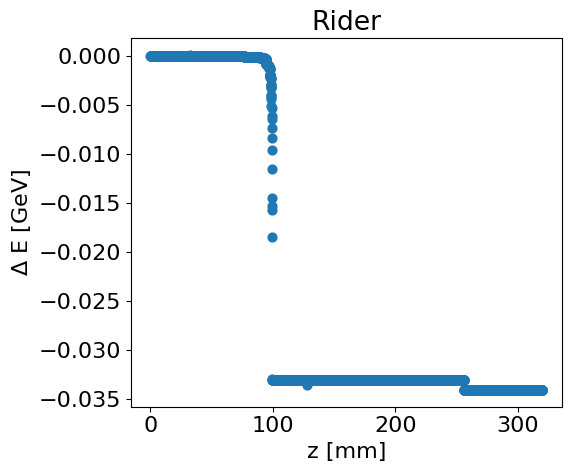

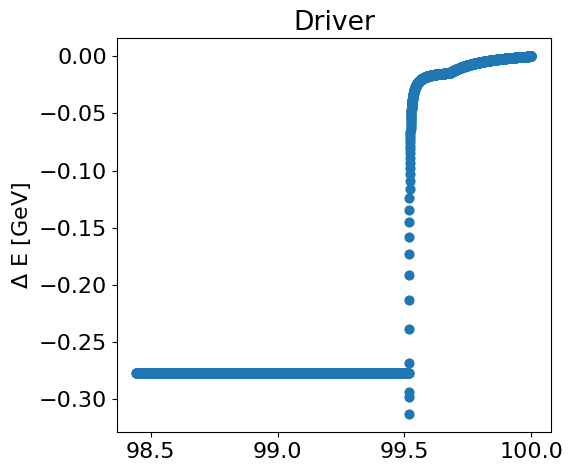

E_MeV =  1137930.9827844235
Gamma =  1212.647494901272
E_rest =  938.385948501337
E_MeV =  -1137929.7689703417
Gamma =  5.979585857162937
E_rest =  193020.75925874696
1.5450000000000001e-07
308.80886190668224
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312
 0.98984503 0.99317875 0.99470276 0.99628785 0.99710766 0.99781573
 0.99834382 0.99871982 0.99902427 0.99924863 0.99942534 0.99955387
 0.99965994 0.99974865 0.99981762]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339
 0.99691727 0.99940069 0.99922311 0.99959776 0.9976921  0.99820469
 0.99618437 0.99986043 0.9998675  0.99976782 0.99994254 0.99781058
 0.99994455 0.99997231 0.99998253]


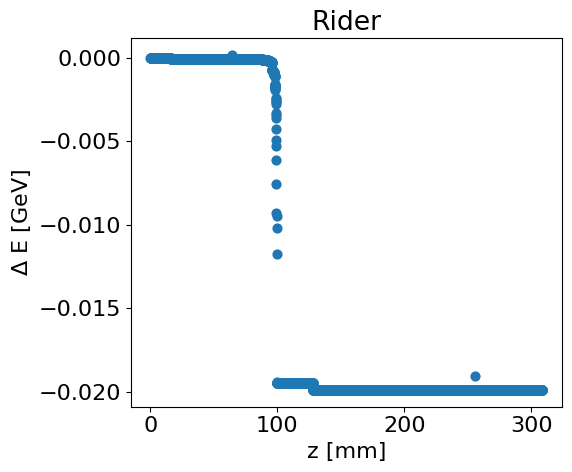

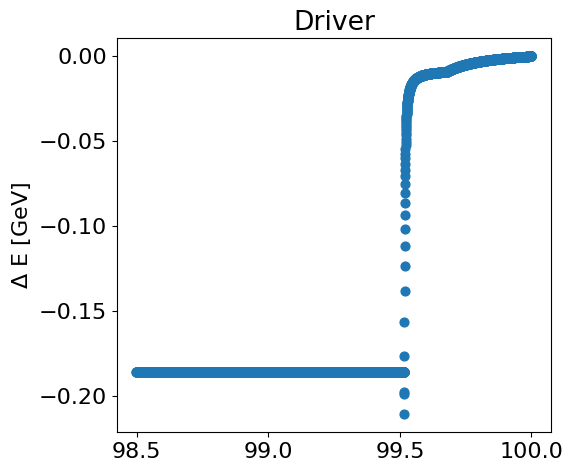

E_MeV =  1044827.6603351207
Gamma =  1113.431081739535
E_rest =  938.385948501337
E_MeV =  -1044821.7666063227
Gamma =  5.504597283360604
E_rest =  193020.75925874696
1.61e-07
295.4717400336488
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312
 0.98984503 0.99317875 0.99470276 0.99628785 0.99710766 0.99781573
 0.99834382 0.99871982 0.99902427 0.99924863 0.99942534 0.99955387
 0.99965994 0.99974865 0.99981762 0.99987177]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339
 0.99691727 0.99940069 0.99922311 0.99959776 0.9976921  0.99820469
 0.99618437 0.99986043 0.9998675  0.99976782 0.99994254 0.99781058
 0.99994455 0.99997231 0.99998253 0.99998772]


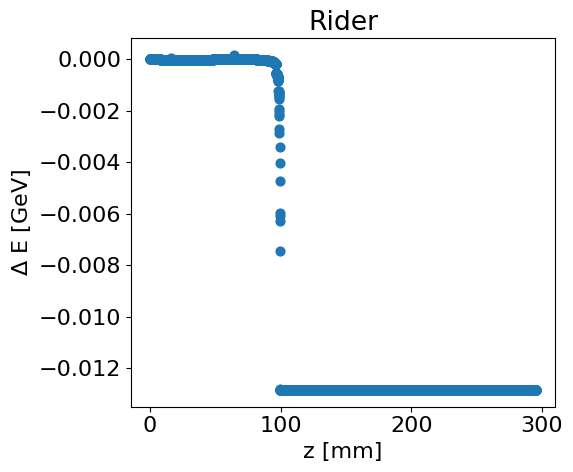

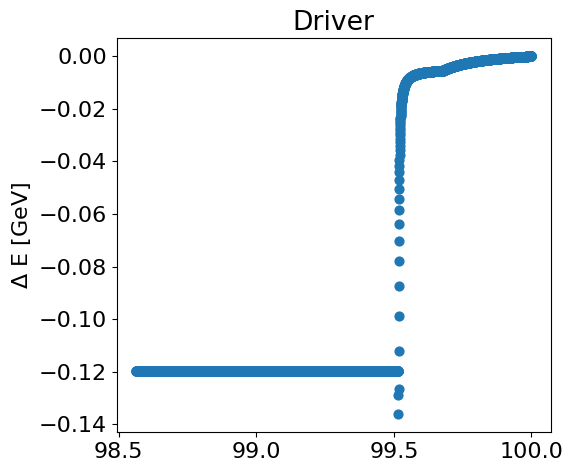

E_MeV =  951724.1753010217
Gamma =  1014.2145025063537
E_rest =  938.385948501337
E_MeV =  -951705.2440392023
Gamma =  5.030970841895676
E_rest =  193020.75925874696
1.675e-07
280.00862313992917
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312
 0.98984503 0.99317875 0.99470276 0.99628785 0.99710766 0.99781573
 0.99834382 0.99871982 0.99902427 0.99924863 0.99942534 0.99955387
 0.99965994 0.99974865 0.99981762 0.99987177 0.99991271]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339
 0.99691727 0.99940069 0.99922311 0.99959776 0.9976921  0.99820469
 0.99618437 0.99986043 0.9998675  0.99976782 0.99994254 0.99781058
 0.99994455 0.99997231 0.99998253 0.99998772 0.99999379]


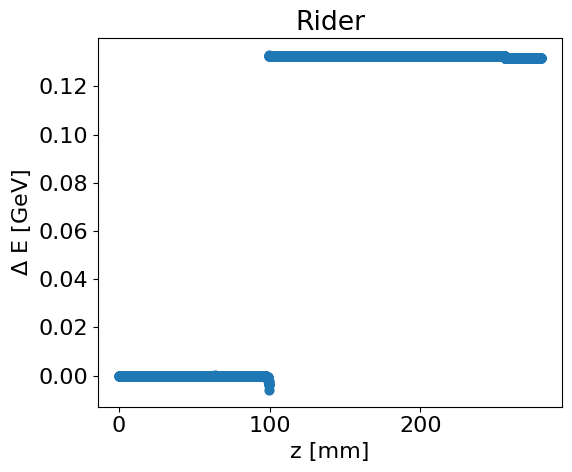

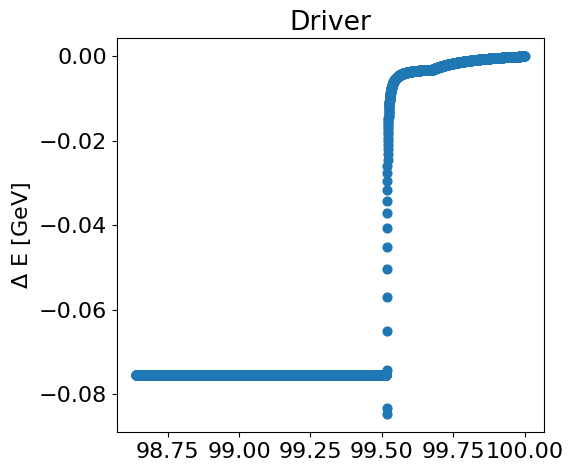

E_MeV =  858620.7701187807
Gamma =  914.9980178950091
E_rest =  938.385948501337
E_MeV =  -858581.9752789014
Gamma =  4.559154048075191
E_rest =  193020.75925874696
1.7400000000000002e-07
262.4195797133786
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312
 0.98984503 0.99317875 0.99470276 0.99628785 0.99710766 0.99781573
 0.99834382 0.99871982 0.99902427 0.99924863 0.99942534 0.99955387
 0.99965994 0.99974865 0.99981762 0.99987177 0.99991271 0.99994382]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339
 0.99691727 0.99940069 0.99922311 0.99959776 0.9976921  0.99820469
 0.99618437 0.99986043 0.9998675  0.99976782 0.99994254 0.99781058
 0.99994455 0.99997231 0.99998253 0.99998772 0.99999379 0.99999639]


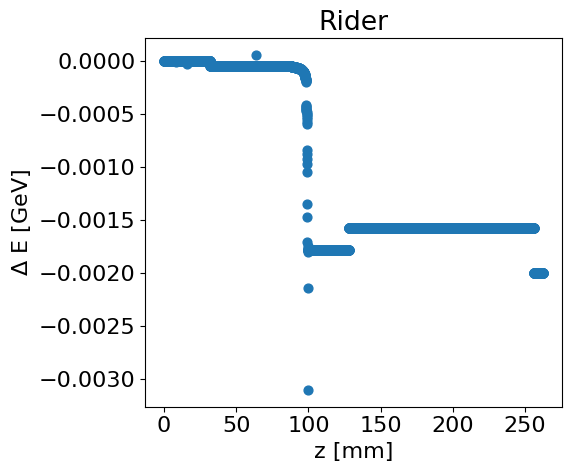

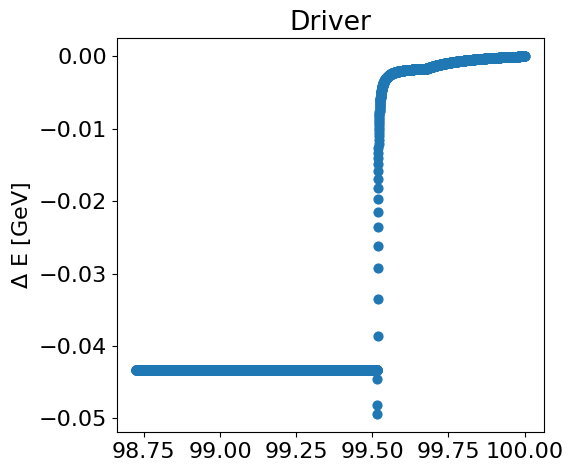

E_MeV =  765517.1527147227
Gamma =  815.7813201306385
E_rest =  938.385948501337
E_MeV =  -765466.5561041945
Gamma =  4.089858951312311
E_rest =  193020.75925874696
1.805e-07
242.70451992604583
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312
 0.98984503 0.99317875 0.99470276 0.99628785 0.99710766 0.99781573
 0.99834382 0.99871982 0.99902427 0.99924863 0.99942534 0.99955387
 0.99965994 0.99974865 0.99981762 0.99987177 0.99991271 0.99994382
 0.9999634 ]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339
 0.99691727 0.99940069 0.99922311 0.99959776 0.9976921  0.99820469
 0.99618437 0.99986043 0.9998675  0.99976782 0.99994254 0.99781058
 0.99994455 0.99997231 0.99998253 0.99998772 0.99999379 0.99999639
 0.99999142]


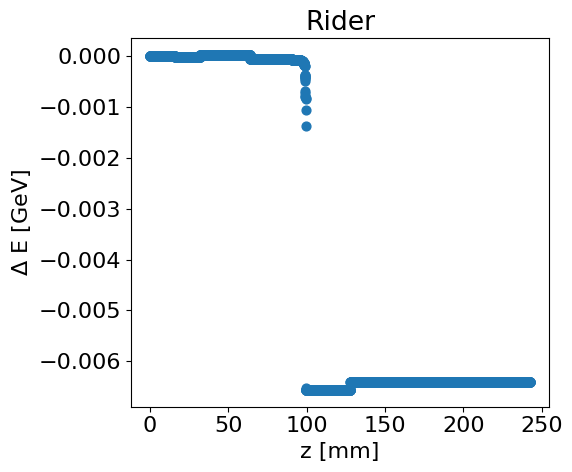

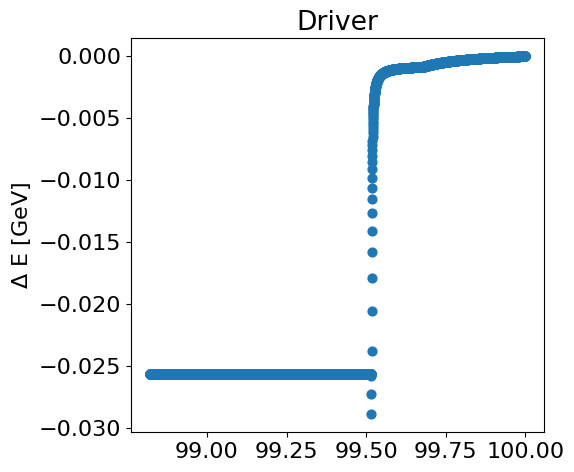

E_MeV =  672413.8462502579
Gamma =  716.5649721260746
E_rest =  938.385948501337
E_MeV =  -672363.7751666248
Gamma =  3.6240729245745973
E_rest =  193020.75925874696
1.8700000000000002e-07
220.86360833681178
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312
 0.98984503 0.99317875 0.99470276 0.99628785 0.99710766 0.99781573
 0.99834382 0.99871982 0.99902427 0.99924863 0.99942534 0.99955387
 0.99965994 0.99974865 0.99981762 0.99987177 0.99991271 0.99994382
 0.9999634  0.99997826]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339
 0.99691727 0.99940069 0.99922311 0.99959776 0.9976921  0.99820469
 0.99618437 0.99986043 0.9998675  0.99976782 0.99994254 0.99781058
 0.99994455 0.99997231 0.99998253 0.99998772 0.99999379 0.99999639
 0.99999142 0.99999233]


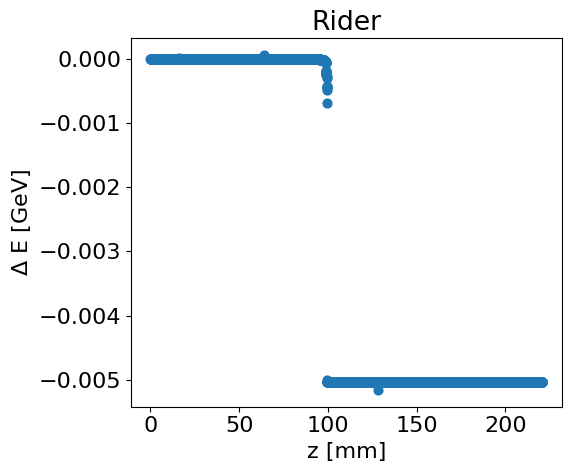

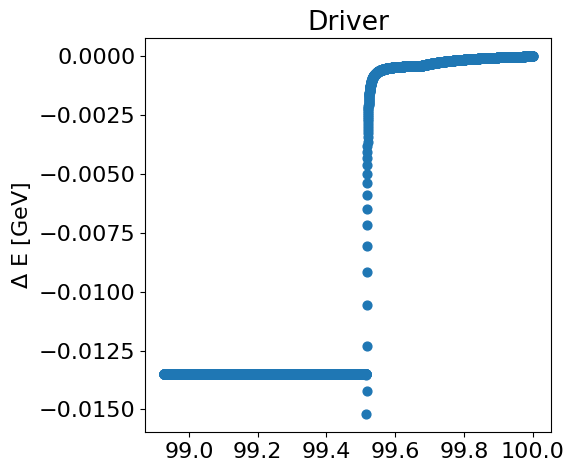

E_MeV =  579310.2482915579
Gamma =  617.3483407659644
E_rest =  938.385948501337
E_MeV =  -579305.4921687552
Gamma =  3.163473066696905
E_rest =  193020.75925874696
1.935e-07
196.89665084097234
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312
 0.98984503 0.99317875 0.99470276 0.99628785 0.99710766 0.99781573
 0.99834382 0.99871982 0.99902427 0.99924863 0.99942534 0.99955387
 0.99965994 0.99974865 0.99981762 0.99987177 0.99991271 0.99994382
 0.9999634  0.99997826 0.99998835]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339
 0.99691727 0.99940069 0.99922311 0.99959776 0.9976921  0.99820469
 0.99618437 0.99986043 0.9998675  0.99976782 0.99994254 0.99781058
 0.99994455 0.99997231 0.99998253 0.99998772 0.99999379 0.99999639
 0.99999142 0.99999233 0.99999917]


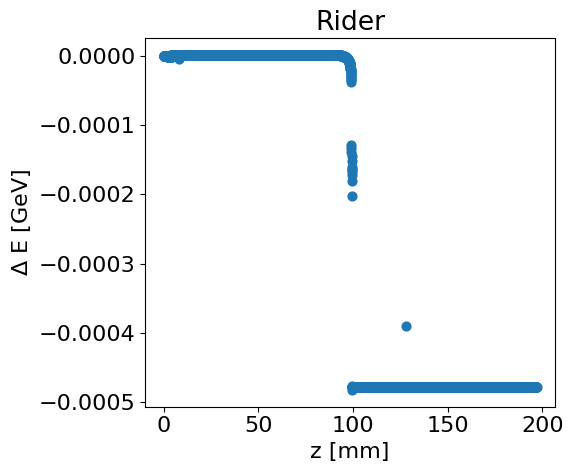

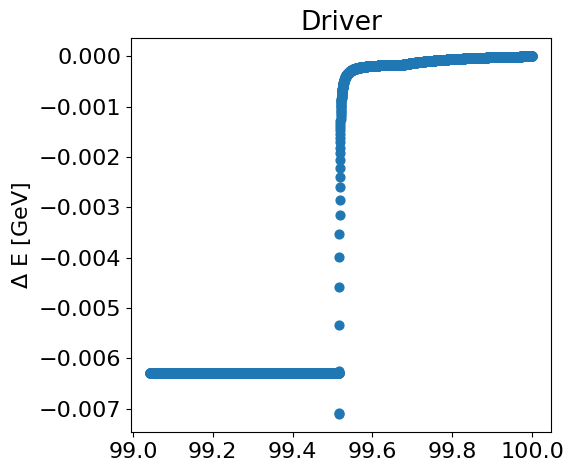

E_MeV =  486206.79334127984
Gamma =  518.1319047519628
E_rest =  938.385948501337
E_MeV =  -486190.4398889283
Gamma =  2.710093714920271
E_rest =  193020.75925874696
2.0000000000000002e-07
170.80379009205063
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312
 0.98984503 0.99317875 0.99470276 0.99628785 0.99710766 0.99781573
 0.99834382 0.99871982 0.99902427 0.99924863 0.99942534 0.99955387
 0.99965994 0.99974865 0.99981762 0.99987177 0.99991271 0.99994382
 0.9999634  0.99997826 0.99998835 0.99999408]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339
 0.99691727 0.99940069 0.99922311 0.99959776 0.9976921  0.99820469
 0.99618437 0.99986043 0.9998675  0.99976782 0.99994254 0.99781058
 0.99994455 0.99997231 0.99998253 0.99998772 0.99999379 0.99999639
 0.99999142 0.99999233 0.99999917 0.99999835]


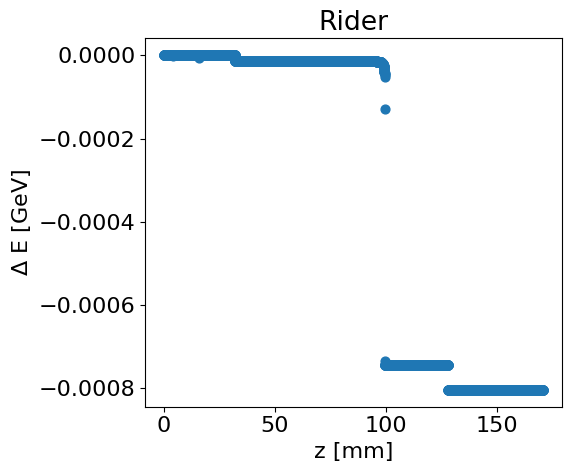

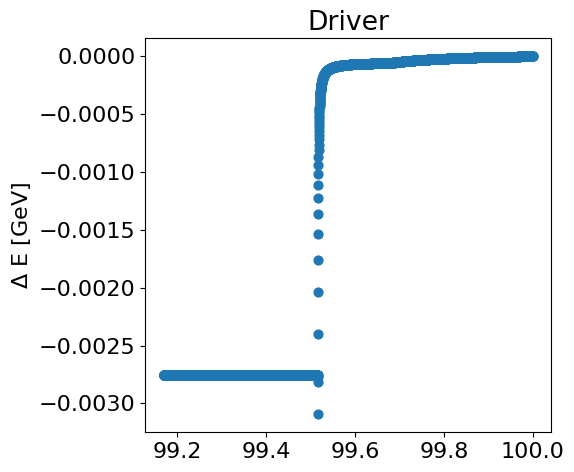

E_MeV =  393103.3345406933
Gamma =  418.91553809834465
E_rest =  938.385948501337
E_MeV =  -393074.17050689756
Gamma =  2.2687146705544774
E_rest =  193020.75925874696
2.065e-07
142.58497772174755
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312
 0.98984503 0.99317875 0.99470276 0.99628785 0.99710766 0.99781573
 0.99834382 0.99871982 0.99902427 0.99924863 0.99942534 0.99955387
 0.99965994 0.99974865 0.99981762 0.99987177 0.99991271 0.99994382
 0.9999634  0.99997826 0.99998835 0.99999408 0.99999748]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339
 0.99691727 0.99940069 0.99922311 0.99959776 0.9976921  0.99820469
 0.99618437 0.99986043 0.9998675  0.99976782 0.99994254 0.99781058
 0.99994455 0.99997231 0.99998253 0.99998772 0.99999379 0.99999639
 0.99999142 0.99999233 0.99999917 0.99999835 0.99999912]


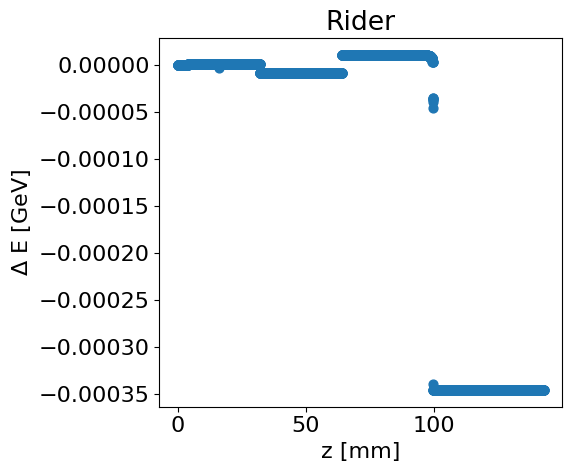

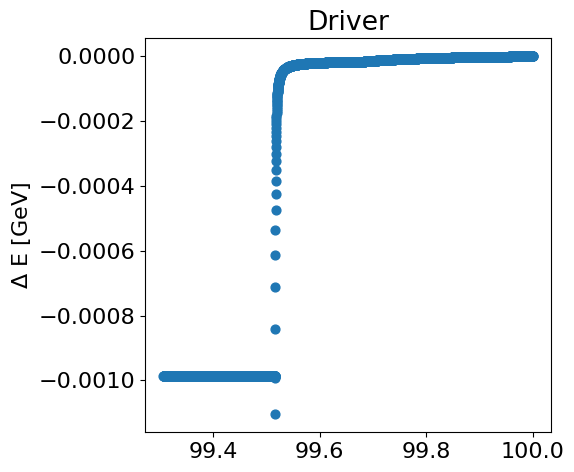

E_MeV =  299999.8581681753
Gamma =  319.69929457921666
E_rest =  938.385948501337
E_MeV =  -299994.2246400459
Gamma =  1.8481232510601833
E_rest =  193020.75925874696
2.1300000000000001e-07
112.24020846425488
driver fractional energy shift [0.89678652 0.93862898 0.95080343 0.96727082 0.97847833 0.98768312
 0.98984503 0.99317875 0.99470276 0.99628785 0.99710766 0.99781573
 0.99834382 0.99871982 0.99902427 0.99924863 0.99942534 0.99955387
 0.99965994 0.99974865 0.99981762 0.99987177 0.99991271 0.99994382
 0.9999634  0.99997826 0.99998835 0.99999408 0.99999748 0.99999916]
rider fractional energy shift [0.99241235 0.99435258 0.96533163 0.96489336 0.99738235 0.99233339
 0.99691727 0.99940069 0.99922311 0.99959776 0.9976921  0.99820469
 0.99618437 0.99986043 0.9998675  0.99976782 0.99994254 0.99781058
 0.99994455 0.99997231 0.99998253 0.99998772 0.99999379 0.99999639
 0.99999142 0.99999233 0.99999917 0.99999835 0.99999912 0.99999992]


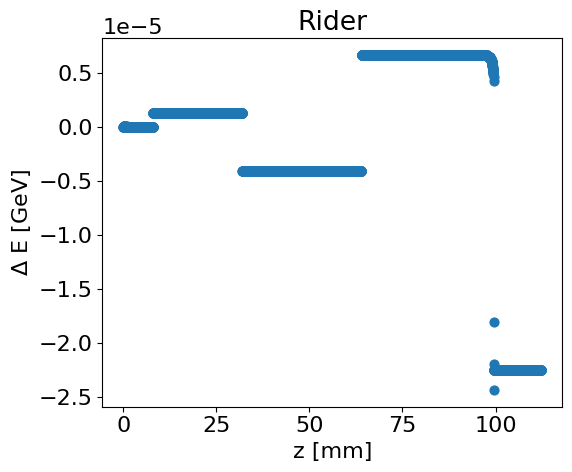

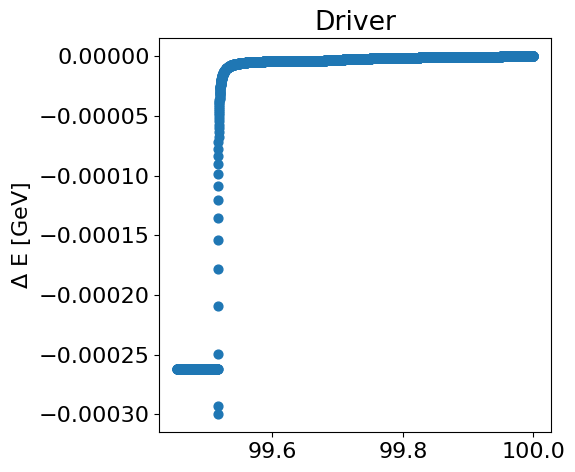

In [121]:
c_ms = 299792458

transv_dist = 1e-4

m_particle_rider = 1.007319468  #proton -amu
m_particle_driver = 207.2 #lead, amu
#m_particle = 0.0005485   #electron -amu
#m_particle_driver = 315 #gold hexafloride, amu

stripped_ions_rider = 1.
stripped_ions_driver = 54.
charge_sign_rider= 1.
charge_sign_driver = 1.
Pz_list = np.linspace(9.584300885e5,9.584295e4,30)
min_dE_MeVs_rider = []
min_dE_MeVs_driver = []
fracs_E_rider = []
fracs_E_driver = []
        
for i in range(0,len(Pz_list)):
#for i in range(0,1):
        #Pz_list = np.linspace(9.584300885e5,9.584295e4,30)
        Pz_list = np.linspace(9.584300885e5,9.584295e4,30)
        
        starting_Pz_rider = Pz_list[i]   #3.25E5 corresponds to 1 TeV
        
        starting_Pz_driver = -starting_Pz_rider/m_particle_driver*m_particle_rider  #actually velocity-like, mass factored later
        transv_mom_rider = 1e-6   #1e-2 is roughly 10keV scale
        transv_mom_driver = transv_mom_rider#*207 # lazy adding lead mass
        starting_distance_rider = 1e-3
        starting_distance_driver = 100.

        sim_type = 2    # type 2 used here, it is for bunch--bunch simulations
        pcount_rider = 1    #bunch counts
        pcount_driver = 1



        init_rider, E_MeV_rest_rider = init_bunch(starting_distance_rider,transv_mom_rider,starting_Pz_rider,stripped_ions_rider,m_particle_rider,transv_dist,pcount_rider,charge_sign_rider)

        init_driver, E_MeV_rest_driver = init_bunch(starting_distance_driver,transv_mom_driver,starting_Pz_driver,stripped_ions_driver,m_particle_driver,-transv_dist,pcount_driver,charge_sign_driver)


        #### parameters not used in this test, but required to run integrator
        bunch_dist = 1E5   #bunch--bunch distance at which the driver bunch has maximum charge (gaussian mean)
        cav_spacing = 1E5  #distance to the subsequent driver bunch
        aperture = 1E5 #this parameter reused for bunch-driven gaussian sigma
        z_cutoff = 0
        wall_pos= 1E5


        #coarse initialization
        # static_steps = 1#set init_steps equal to tot_steps to test static integrator only
        # ret_steps = 25
        # step_size = 2e-6

        #interaction zone
        static_steps = 1
        ret_steps = 5500
        #step_size = 1e-7 #+ 2.3e-6 / ( (i+1) / (25) )
        step_size = 1.8e-8 + (i+1)*6.5e-9 
        print(step_size)
        
        retarded_traj,retarded_drv_traj = retarded_integrator3(static_steps,ret_steps,step_size,wall_pos,aperture,sim_type,init_rider,init_driver,bunch_dist,cav_spacing,z_cutoff)#just use retarded_intergrator2 for retarded calcs
        #retarded_traj,retarded_drv_traj = retarded_integrator3(static_steps,ret_steps,step_size,wall_pos,aperture,sim_type,retarded_traj_pre[-1],retarded_drv_traj_pre[-1],bunch_dist,cav_spacing,z_cutoff)#just use retarded_intergrator2 for retarded calcs
        #retarded_traj,retarded_drv_traj = retarded_traj2,retarded_drv_traj2

        delta_e, delta_e_drv, tot_e, tot_e_drv, delta_e_keV, delta_e_MeV, tot_e_GeV, delta_e_keV_drv, delta_e_MeV_drv, tot_e_GeV_drv, zs, xs, zs_drv, xs_drv, bzs, bxs, bys, bdotxs, bdotys, bdotzs, Pzs, Pxs, Pys, Pts, gammas, tees, bzs_drv, bxs_drv, bys_drv, bdotxs_drv, bdotys_drv, bdotzs_drv, Pzs_drv, Pxs_drv, Pys_drv, Pts_drv, gammas_drv, tees_drv, qs_drv, gam_fixed, bdotzs_seconds, q_statC_squared, q_kg_m3_sneg2, Pows_z_rider_watts = calculate_plotting_variables(retarded_traj,
        retarded_drv_traj, init_rider, init_driver, static_steps, ret_steps, E_MeV_rest_rider, E_MeV_rest_driver, c_ms)
        min_dE_MeVs_rider = np.append(min_dE_MeVs_rider,np.min(delta_e_MeV))
        min_dE_MeVs_driver = np.append(min_dE_MeVs_driver,np.min(delta_e_MeV_drv))
        # max_dE_MeVs_rider = np.append(max_dE_MeVs_rider,np.max(np.abs(delta_e_MeV)))
        # max_dE_MeVs_driver = np.append(max_dE_MeVs_driver,np.max(np.abs(delta_e_MeV_drv)))
        print(zs[-1])
        frac_E_rider = np.divide(np.min(tot_e),tot_e[0])
        frac_E_driver = np.divide(np.min(tot_e_drv),tot_e_drv[0])
        fracs_E_rider = np.append(fracs_E_rider,frac_E_rider)
        fracs_E_driver = np.append(fracs_E_driver,frac_E_driver)
        print("driver fractional energy shift", fracs_E_driver)
        print("rider fractional energy shift", fracs_E_rider)

        fig = plt.figure(figsize=(6,5))
        ax = fig.add_subplot(1, 1, 1) 
        ax.scatter(zs,delta_e_MeV/1000,s=40)
        #ax.scatter(zs_drv,delta_e_MeV_drv,s=40)
        #ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
        ax.set_ylabel(r"$\Delta$ E [GeV]")
        ax.set_xlabel(r"z [mm]")
        #ax.axvline(30,color='g',label="wall paosition")
        #plt.xlim(starting_distance_rider/2,3)
        #plt.ylim(1E-2,2e3)
        #plt.xscale('log')  #log scale works at 1mm range
        #plt.yscale('log')
        plt.title("Rider")
        plt.tight_layout()
        #plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
        plt.show()

        fig = plt.figure(figsize=(6,5))
        ax = fig.add_subplot(1, 1, 1) 
        #ax.scatter(zs,delta_e_MeV,s=40)
        ax.scatter(zs_drv,delta_e_MeV_drv/1000,s=40)
        #ax.scatter(zs_drv,np.abs(delta_e_MeV_drv/1000),s=40)  #for log plotting
        #ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
        ax.set_ylabel(r"$\Delta$ E [GeV]")
        #ax.set_xlabel(r"z [mm]")
        #ax.axvline(30,color='g',label="wall paosition")
        #plt.xlim(-0.54,0.01)
        #plt.ylim(1E-5,5e3)
        #plt.xscale('log')
        #plt.yscale('log')
        plt.title("Driver")
        plt.tight_layout()
        #plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
        plt.show()





In [122]:
amu_kg = 1.66053907E-27
c_ms = 299792458 # Speed of light in m/s
mass_kg = m_particle_driver*amu_kg
vz_mmns = Pz_list/(m_particle_driver*gammas_drv[0]) #NOT mass_kg here
vz_ms = vz_mmns*1e6
Pz_kgms  = vz_ms*mass_kg*gammas_drv[0]
E_J     = Pz_kgms*c_ms
E_MeV_drv = E_J*6.242E12

In [123]:
amu_kg = 1.66053907E-27
c_ms = 299792458 # Speed of light in m/s
mass_kg = m_particle_rider*amu_kg
vz_mmns = Pz_list/(m_particle_rider*gammas[0]) #NOT mass_kg here
vz_ms = vz_mmns*1e6
Pz_kgms  = vz_ms*mass_kg*gammas[0]
E_J     = Pz_kgms*c_ms
E_MeV = E_J*6.242E12

In [124]:
E_MeV_drv

array([2978200.99855094, 2885774.06470387, 2793347.13085681,
       2700920.19700975, 2608493.26316268, 2516066.32931562,
       2423639.39546856, 2331212.4616215 , 2238785.52777443,
       2146358.59392737, 2053931.66008031, 1961504.72623325,
       1869077.79238618, 1776650.85853912, 1684223.92469206,
       1591796.990845  , 1499370.05699793, 1406943.12315087,
       1314516.18930381, 1222089.25545674, 1129662.32160968,
       1037235.38776262,  944808.45391556,  852381.52006849,
        759954.58622143,  667527.65237437,  575100.71852731,
        482673.78468024,  390246.85083318,  297819.91698612])

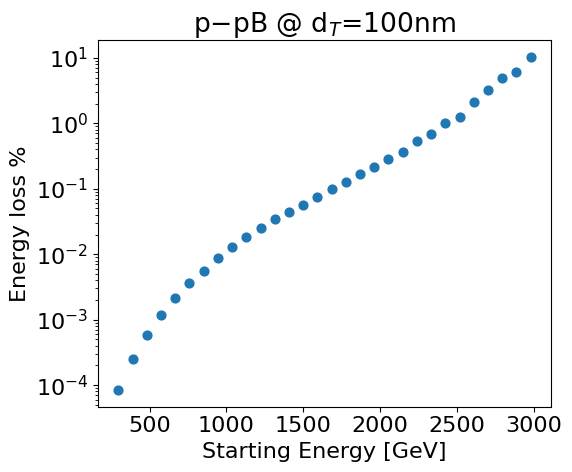

In [143]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
#ax.scatter(zs,delta_e_MeV,s=40)
ax.scatter(E_MeV_drv/1000,np.abs(fracs_E_driver-1)*100,s=40,label="pB")
#ax.scatter(E_MeV/1000,np.abs(fracs_E_rider-1)*100,s=40,label="p")
#ax.scatter(zs_drv,np.abs(delta_e_MeV_drv/1000),s=40)  #for log plotting
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Energy loss %")
ax.set_xlabel(r"Starting Energy [GeV]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-0.54,0.01)
#plt.ylim(1E-5,5e3)
#plt.xscale('log')
plt.yscale('log')
plt.title("p$-$pB @ d$_T$=100nm")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()

In [126]:
fracs_E_driver

array([0.89678652, 0.93862898, 0.95080343, 0.96727082, 0.97847833,
       0.98768312, 0.98984503, 0.99317875, 0.99470276, 0.99628785,
       0.99710766, 0.99781573, 0.99834382, 0.99871982, 0.99902427,
       0.99924863, 0.99942534, 0.99955387, 0.99965994, 0.99974865,
       0.99981762, 0.99987177, 0.99991271, 0.99994382, 0.9999634 ,
       0.99997826, 0.99998835, 0.99999408, 0.99999748, 0.99999916])

In [127]:
fracs_E_rider

array([0.99241235, 0.99435258, 0.96533163, 0.96489336, 0.99738235,
       0.99233339, 0.99691727, 0.99940069, 0.99922311, 0.99959776,
       0.9976921 , 0.99820469, 0.99618437, 0.99986043, 0.9998675 ,
       0.99976782, 0.99994254, 0.99781058, 0.99994455, 0.99997231,
       0.99998253, 0.99998772, 0.99999379, 0.99999639, 0.99999142,
       0.99999233, 0.99999917, 0.99999835, 0.99999912, 0.99999992])

In [128]:
np.append(max_dE_MeVs_driver,1)

array([2.46292310e+06, 2.07309385e+06, 2.00157069e+06, 1.07729278e+06,
       1.04281961e+06, 1.10965987e+06, 3.61616640e+05, 1.00000000e+00])

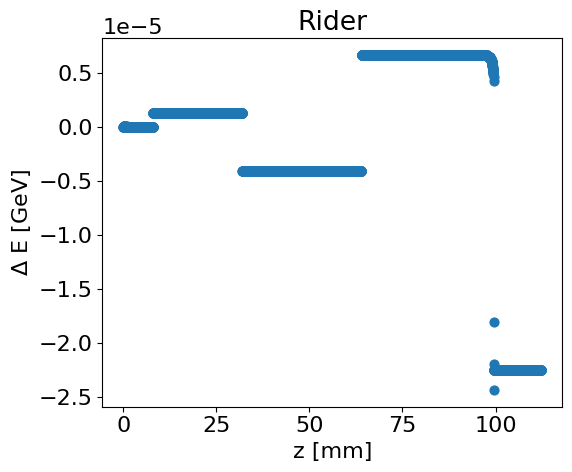

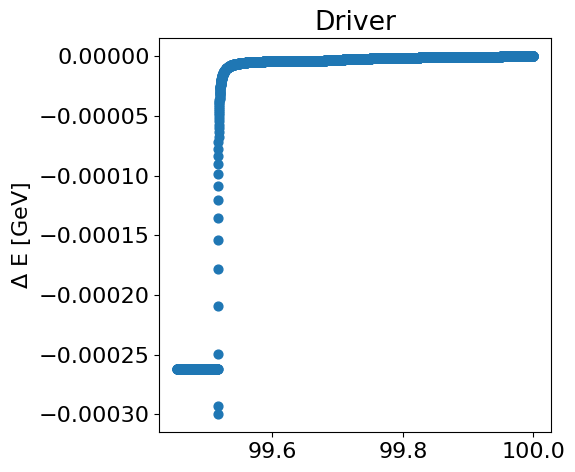

In [129]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,delta_e_MeV/1000,s=40)
#ax.scatter(zs_drv,delta_e_MeV_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"$\Delta$ E [GeV]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(starting_distance_rider/2,3)
#plt.ylim(1E-2,2e3)
#plt.xscale('log')  #log scale works at 1mm range
#plt.yscale('log')
plt.title("Rider")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
#ax.scatter(zs,delta_e_MeV,s=40)
ax.scatter(zs_drv,delta_e_MeV_drv/1000,s=40)
#ax.scatter(zs_drv,np.abs(delta_e_MeV_drv/1000),s=40)  #for log plotting
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"$\Delta$ E [GeV]")
#ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-0.54,0.01)
#plt.ylim(1E-5,5e3)
#plt.xscale('log')
#plt.yscale('log')
plt.title("Driver")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()



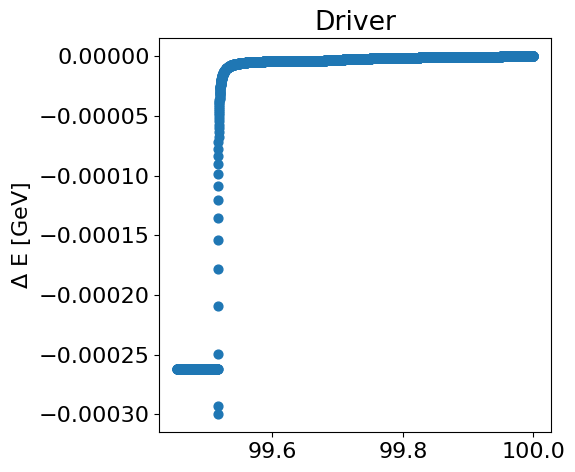

In [130]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
#ax.scatter(zs,delta_e_MeV,s=40)
ax.scatter(zs_drv,delta_e_MeV_drv/1000,s=40)
#ax.scatter(zs_drv,np.abs(delta_e_MeV_drv/1000),s=40)  #for log plotting
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"$\Delta$ E [GeV]")
#ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-0.54,0.01)
#plt.ylim(1E-5,5e3)
#plt.xscale('log')
#plt.yscale('log')
plt.title("Driver")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()



In [131]:
10/3000*100

0.33333333333333337

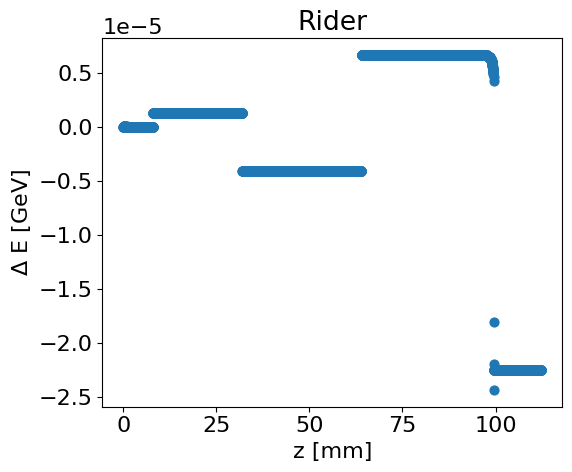

In [132]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,delta_e_MeV/1000,s=40)
#ax.scatter(zs_drv,delta_e_MeV_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"$\Delta$ E [GeV]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(starting_distance_rider/2,3)
#plt.ylim(1E-2,2e3)
#plt.xscale('log')  #log scale works at 1mm range
#plt.yscale('log')
plt.title("Rider")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()

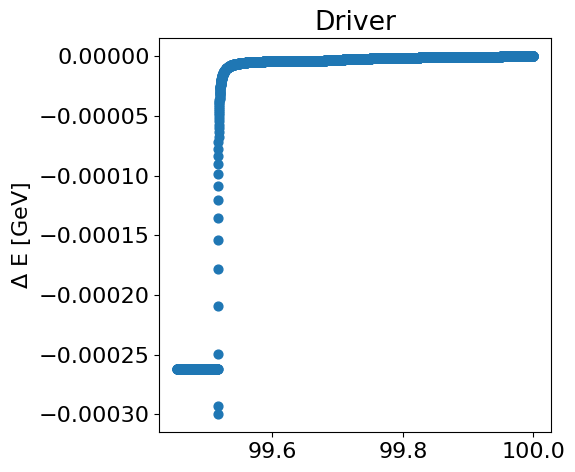

In [133]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
#ax.scatter(zs,delta_e_MeV,s=40)
ax.scatter(zs_drv,delta_e_MeV_drv/1000,s=40)
#ax.scatter(zs_drv,np.abs(delta_e_MeV_drv/1000),s=40)  #for log plotting
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"$\Delta$ E [GeV]")
#ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-0.54,0.01)
#plt.ylim(1E-5,5e3)
#plt.xscale('log')
#plt.yscale('log')
plt.title("Driver")
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()



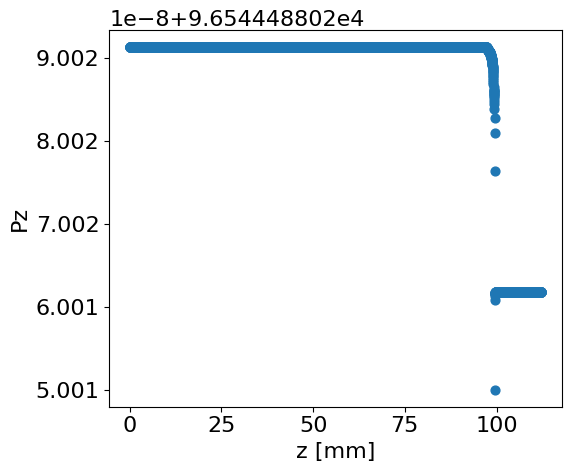

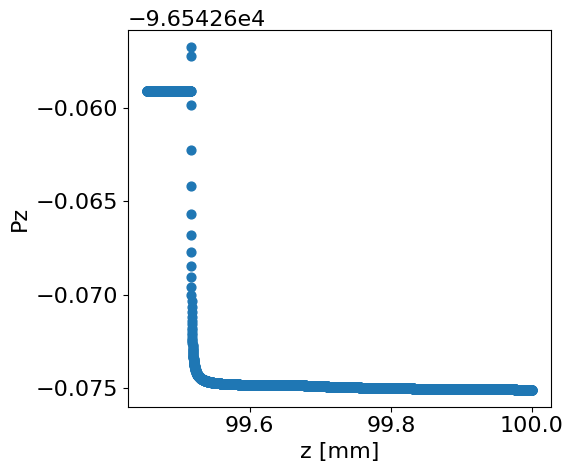

In [134]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,Pzs,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pz")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,Pzs_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pz")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

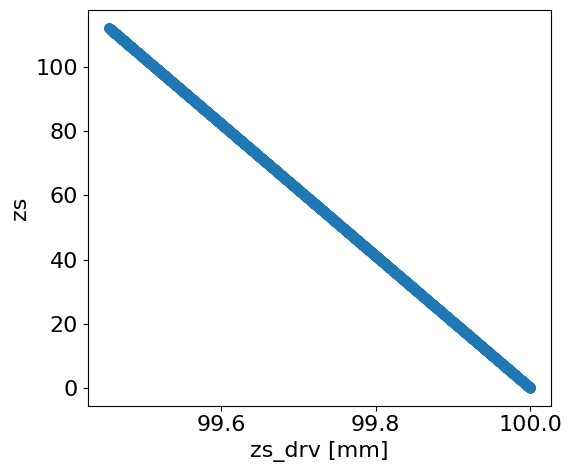

In [135]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,zs,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"zs")
ax.set_xlabel(r"zs_drv [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.ylim(2E-2,5)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
plt.show()

### Various other plots

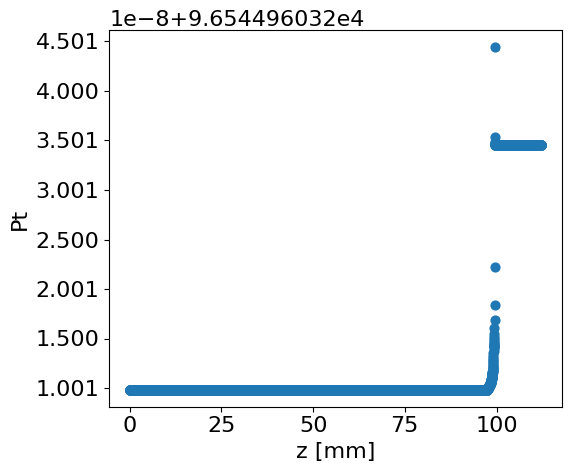

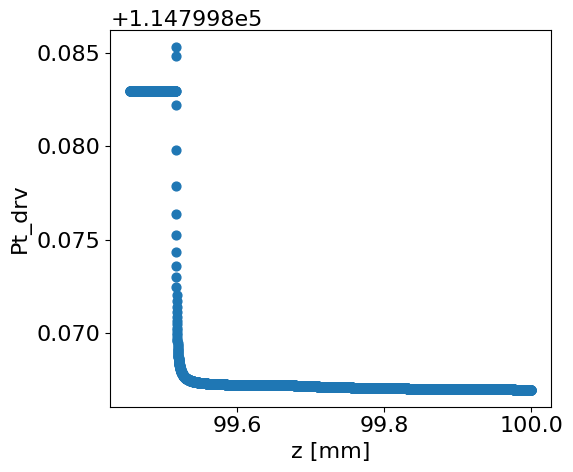

In [136]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,Pts,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pt")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,Pts_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pt_drv")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

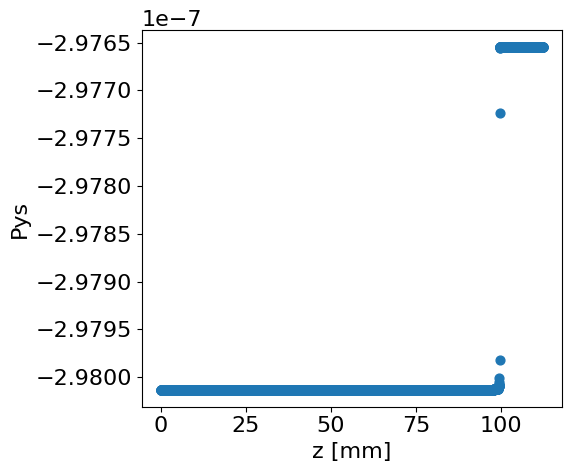

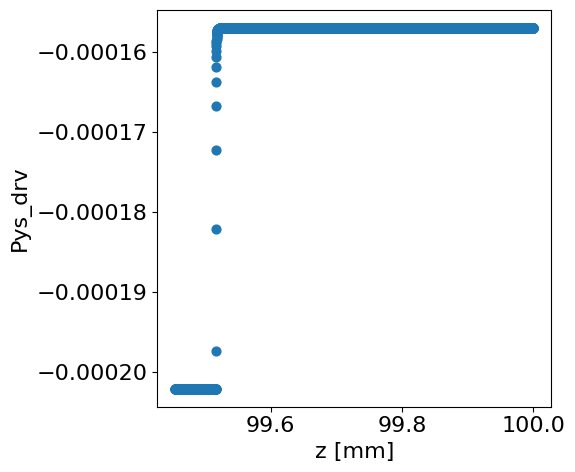

In [137]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,Pys,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pys")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,Pys_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pys_drv")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

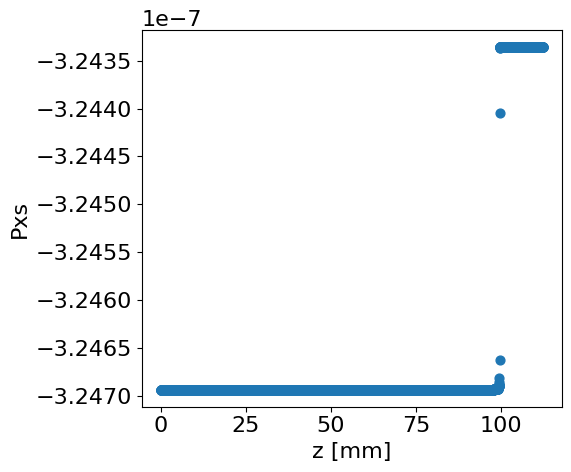

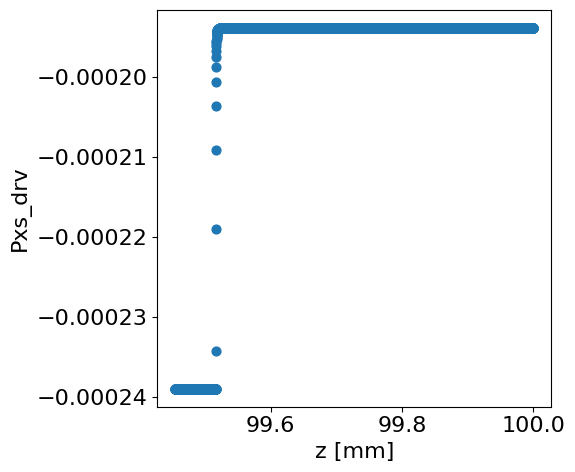

In [138]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,Pxs,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pxs")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,Pxs_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"Pxs_drv")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

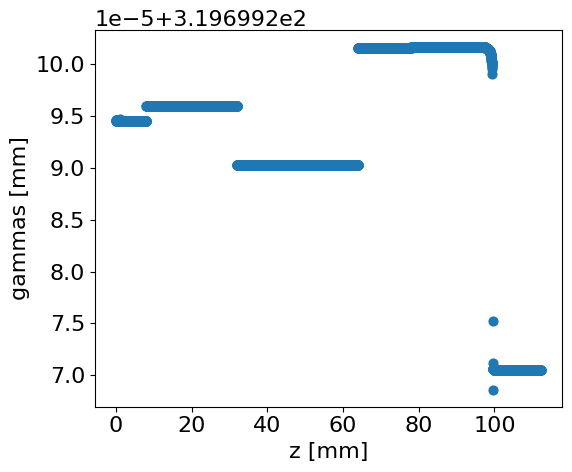

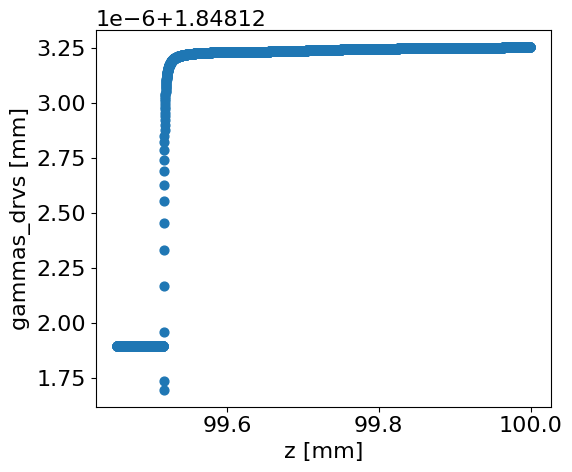

In [139]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,gammas,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"gammas [mm]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,gammas_drv,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"gammas_drvs [mm]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()

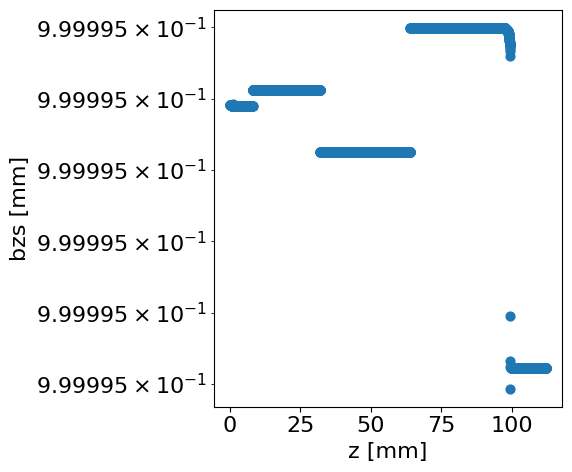

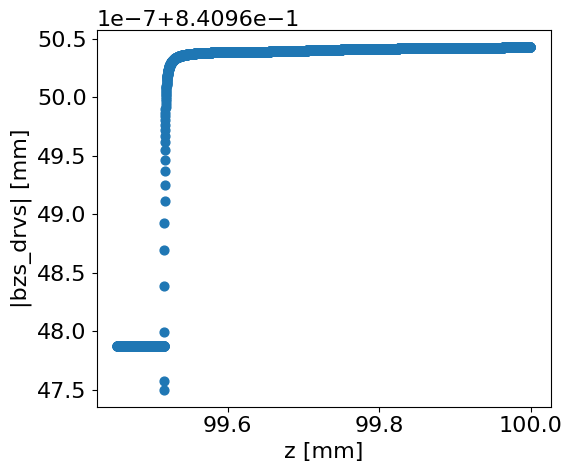

In [140]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs,bzs,s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"bzs [mm]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()


fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
ax.scatter(zs_drv,np.abs(bzs_drv),s=40)
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"|bzs_drvs| [mm]")
ax.set_xlabel(r"z [mm]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-315,45)
#plt.yscale('log')
plt.tight_layout()
#plt.savefig("/home/benfolsom/notebooks/cov_ret_prab_figures/6.15_35MeV_electron_pinholev1.png",dpi=600)
plt.show()